In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [42]:
# !pip install emoji
!pip install qalsadi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.6/256.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.5/360.5 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.1/65.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.0/139.0 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.6/332.6 kB 26.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.5/251.5 kB 16.9 MB/s eta 0:00:00
  Created wheel for pickledb: filename=pickleDB-0.9.2-py3-none-any.whl size=4254 sha256=9f1fba477505602a641cb828e137fc55faa435ef7fcc042f13e2897581175ee7
  Stored in directory: /root/.cache/pip/wheels/31/99/ef/8bf37f0157e6423a373297de279351af04ad18c4136c3af121
Successfully built pickledb


# **Imports**

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
#from keras.utils import np_utils
import qalsadi.lemmatizer
from nltk.stem.isri import ISRIStemmer
import re
import emoji
from nltk.corpus import stopwords
init_notebook_mode(connected=True)
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
from operator import is_not
import tensorflow as tf

from functools import partial
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import classification_report , roc_curve, f1_score, accuracy_score, recall_score , roc_auc_score,make_scorer,precision_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers
from keras.backend import clear_session
from tensorflow import keras


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df=pd.read_excel("All_Scrapped_Sentiment_Dataset.xlsx")

In [ ]:
df

,Unnamed: 0,review,rating
0,0,المنتج لم يصلني . وصلتي منتج مختلف اللي وصلني ...,0
1,1,السماعة اشتريتها قبل كده وممتازة جدا دلوقتى اش...,0
2,2,ممتازة جدا والسعر جيد جدا شكرا للبائع وشكرا نوون,1
3,3,ممتاز,1
4,4,الصنية حجمها كبير وتقيلة ما شاء الله شكرا نون,1
...,...,...,...
112447,112447,"حالة عدم مصداقية , تم استلام المنتج وهو تحت ال...",1
112448,112448,"نوعية المعدن رديئة , نوعية معدن البريسليت رديئ...",0
112449,112449,Only 11 gems in the bracelet/ Product descript...,0
112450,112450,"الانسيال مش زي الصورة خالص , للاسف المنتج صدمن...",0


# **Preprocessing**

In [70]:
def data_preprocessing(text):
    emojis = {
        "🙂":"يبتسم",
        "😂":"يضحك",
        "💔":"قلب حزين",
        "🙂":"يبتسم",
        "❤️":"حب",
        "❤":"حب",
        "😍":"حب",
        "😭":"يبكي",
        "😢":"حزن",
        "😔":"حزن",
        "♥":"حب",
        "💜":"حب",
        "😅":"يضحك",
        "🙁":"حزين",
        "💕":"حب",
        "💙":"حب",
        "😞":"حزين",
        "😊":"سعادة",
        "👏":"يصفق",
        "👌":"احسنت",
        "😴":"ينام",
        "😀":"يضحك",
        "😌":"حزين",
        "🌹":"وردة",
        "🙈":"حب",
        "😄":"يضحك",
        "😐":"محايد",
        "✌":"منتصر",
        "✨":"نجمه",
        "🤔":"تفكير",
        "😏":"يستهزء",
        "😒":"يستهزء",
        "🙄":"ملل",
        "😕":"عصبية",
        "😃":"يضحك",
        "🌸":"وردة",
        "😓":"حزن",
        "💞":"حب",
        "💗":"حب",
        "😑":"منزعج",
        "💭":"تفكير",
        "😎":"ثقة",
        "💛":"حب",
        "😩":"حزين",
        "💪":"عضلات",
        "👍":"موافق",
        "🙏🏻":"رجاء طلب",
        "😳":"مصدوم",
        "👏🏼":"تصفيق",
        "🎶":"موسيقي",
        "🌚":"صمت",
        "💚":"حب",
        "🙏":"رجاء طلب",
        "💘":"حب",
        "🍃":"سلام",
        "☺":"يضحك",
        "🐸":"ضفدع",
        "😶":"مصدوم",
        "✌️":"مرح",
        "✋🏻":"توقف",
        "😉":"غمزة",
        "🌷":"حب",
        "🙃":"مبتسم",
        "😫":"حزين",
        "😨":"مصدوم",
        "🎼 ":"موسيقي",
        "🍁":"مرح",
        "🍂":"مرح",
        "💟":"حب",
        "😪":"حزن",
        "😆":"يضحك",
        "😣":"استياء",
        "☺️":"حب",
        "😱":"كارثة",
        "😁":"يضحك",
        "😖":"استياء",
        "🏃🏼":"يجري",
        "😡":"غضب",
        "🚶":"يسير",
        "🤕":"مرض",
        "‼️":"تعجب",
        "🕊":"طائر",
        "👌🏻":"احسنت",
        "❣":"حب",
        "🙊":"مصدوم",
        "💃":"سعادة مرح",
        "💃🏼":"سعادة مرح",
        "😜":"مرح",
        "👊":"ضربة",
        "😟":"استياء",
        "💖":"حب",
        "😥":"حزن",
        "🎻":"موسيقي",
        "✒":"يكتب",
        "🚶🏻":"يسير",
        "💎":"الماظ",
        "😷":"وباء مرض",
        "☝":"واحد",
        "🚬":"تدخين",
        "💐" : "ورد",
        "🌞" : "شمس",
        "👆" : "الاول",
        "⚠️" :"تحذير",
        "🤗" : "احتواء",
        "✖️": "غلط",
        "📍"  : "مكان",
        "👸" : "ملكه",
        "👑" : "تاج",
        "✔️" : "صح",
        "💌": "قلب",
        "😲" : "مندهش",
        "💦": "ماء",
        "🚫" : "خطا",
        "👏🏻" : "برافو",
        "🏊" :"يسبح",
        "👍🏻": "تمام",
        "⭕️" :"دائره كبيره",
        "🎷" : "ساكسفون",
        "👋": "تلويح باليد",
        "✌🏼": "علامه النصر",
        "🌝":"مبتسم",
        "➿"  : "عقده مزدوجه",
        "💪🏼" : "قوي",
        "📩":  "تواصل معي",
        "☕️": "قهوه",
        "😧" : "قلق و صدمة",
        "🗨": "رسالة",
        "❗️" :"تعجب",
        "🙆🏻": "اشاره موافقه",
        "👯" :"اخوات",
        "©" :  "رمز",
        "👵🏽" :"سيده عجوزه",
        "🐣": "كتكوت",
        "🙌": "تشجيع",
        "🙇": "شخص ينحني",
        "👐🏽":"ايدي مفتوحه",
        "👌🏽": "بالظبط",
        "⁉️" : "استنكار",
        "⚽️": "كوره",
        "🕶" :"حب",
        "🎈" :"بالون",
        "🎀":    "ورده",
        "💵":  "فلوس",
        "😋":  "جائع",
        "😛":  "يغيظ",
        "😠":  "غاضب",
        "✍🏻":  "يكتب",
        "🌾":  "ارز",
        "👣":  "اثر قدمين",
        "❌":"رفض",
        "🍟":"طعام",
        "👬":"صداقة",
        "🐰":"ارنب",
        "☂":"مطر",
        "⚜":"مملكة فرنسا",
        "🐑":"خروف",
        "🗣":"صوت مرتفع",
        "👌🏼":"احسنت",
        "☘":"مرح",
        "😮":"صدمة",
        "😦":"قلق",
        "⭕":"الحق",
        "✏️":"قلم",
        "ℹ":"معلومات",
        "🙍🏻":"رفض",
        "⚪️":"نضارة نقاء",
        "🐤":"حزن",
        "💫":"مرح",
        "💝":"حب",
        "🍔":"طعام",
        "❤︎":"حب",
        "✈️":"سفر",
        "🏃🏻‍♀️":"يسير",
        "🍳":"ذكر",
        "🎤":"مايك غناء",
        "🎾":"كره",
        "🐔":"دجاجة",
        "🙋":"سؤال",
        "📮":"بحر",
        "💉":"دواء",
        "🙏🏼":"رجاء طلب",
        "💂🏿 ":"حارس",
        "🎬":"سينما",
        "♦️":"مرح",
        "💡":"قكرة",
        "‼":"تعجب",
        "👼":"طفل",
        "🔑":"مفتاح",
        "♥️":"حب",
        "🕋":"كعبة",
        "🐓":"دجاجة",
        "💩":"معترض",
        "👽":"فضائي",
        "☔️":"مطر",
        "🍷":"عصير",
        "🌟":"نجمة",
        "☁️":"سحب",
        "👃":"معترض",
        "🌺":"مرح",
        "🔪":"سكينة",
        "♨":"سخونية",
        "👊🏼":"ضرب",
        "✏":"قلم",
        "🚶🏾‍♀️":"يسير",
        "👊":"ضربة",
        "◾️":"وقف",
        "😚":"حب",
        "🔸":"مرح",
        "👎🏻":"لا يعجبني",
        "👊🏽":"ضربة",
        "😙":"حب",
        "🎥":"تصوير",
        "👉":"جذب انتباه",
        "👏🏽":"يصفق",
        "💪🏻":"عضلات",
        "🏴":"اسود",
        "🔥":"حريق",
        "😬":"عدم الراحة",
        "👊🏿":"يضرب",
        "🌿":"ورقه شجره",
        "✋🏼":"كف ايد",
        "👐":"ايدي مفتوحه",
        "☠️":"وجه مرعب",
        "🎉":"يهنئ",
        "🔕" :"صامت",
        "😿":"وجه حزين",
        "☹️":"وجه يائس",
        "😘" :"حب",
        "😰" :"خوف و حزن",
        "🌼":"ورده",
        "💋":  "بوسه",
        "👇":"لاسفل",
        "❣️":"حب",
        "🎧":"سماعات",
        "📝":"يكتب",
        "😇":"دايخ",
        "😈":"رعب",
        "🏃":"يجري",
        "✌🏻":"علامه النصر",
        "🔫":"يضرب",
        "❗️":"تعجب",
        "👎":"غير موافق",
        "🔐":"قفل",
        "👈":"لليمين",
        "™":"رمز",
        "🚶🏽":"يتمشي",
        "😯":"متفاجأ",
        "✊":"يد مغلقه",
        "😻":"اعجاب",
        "🙉" :"قرد",
        "👧":"طفله صغيره",
        "🔴":"دائره حمراء",
        "💪🏽":"قوه",
        "💤":"ينام",
        "👀":"ينظر",
        "✍🏻":"يكتب",
        "❄️":"تلج",
        "💀":"رعب",
        "😤":"وجه عابس",
        "🖋":"قلم",
        "🎩":"كاب",
        "☕️":"قهوه",
        "😹":"ضحك",
        "💓":"حب",
        "☄️ ":"نار",
        "👻":"رعب",
        "❎":"خطء",
        "🤮":"حزن",
        '🏻':"احمر"
    }

    emoticons_to_emoji = {
        ":)" : "🙂",
        ":(" : "🙁",
        "xD" : "😆",
        ":=(": "😭",
        ":'(": "😢",
        ":'‑(": "😢",
        "XD" : "😂",
        ":D" : "🙂",
        "♬" : "موسيقي",
        "♡" : "❤",
        "☻"  : "🙂",
    }

    def remove_diacritics(text):
        arabic_diacritics = re.compile(""" ّ    | # Tashdid
                            َ    | # Fatha
                            ً    | # Tanwin Fath
                            ُ    | # Damma
                            ٌ    | # Tanwin Damm
                            ِ    | # Kasra
                            ٍ    | # Tanwin Kasr
                            ْ    | # Sukun
                            ـ     # Tatwil/Kashida
                        """, re.VERBOSE)
        text = re.sub(arabic_diacritics, '', str(text))
        return text

    def remove_longation(text):
        #remove longation/non-arabic
        text = re.sub("[إأآا]", "ا", text)
        text = re.sub("ى", "ي", text)
        text = re.sub("ؤ", "ء", text)
        text = re.sub("ئ", "ء", text)
        text = re.sub("ة", "ه", text)
        text = re.sub("گ", "ك", text)
        text=re.sub(r'[^\u0621-\u064A]+', ' ', text)

        return text

    def remove_urls(text):

        text = re.sub(r'^https?://.[\r\n]', '', text, flags=re.MULTILINE)
        text = re.sub(r'^http?://.[\r\n]', '', text, flags=re.MULTILINE)
        text = re.sub(r"http\S+", "", text)
        text = re.sub(r"https\S+", "", text)
        text = re.sub(r'\s+', ' ', text)
        text = re.sub("(\s\d+)","",text)
        text = re.sub(r"$\d+\W+|\b\d+\b|\W+\d+$", "", text)
        text = re.sub("\d+", " ", text)
        return text

    def checkemojie(text):
        emojistext=[]
        for char in text:
            if any(emoji.distinct_emoji_list(char)) and char in emojis.keys():
                emojistext.append(emojis[emoji.distinct_emoji_list(char)[0]])
        return " ".join(emojistext)

    def emojiTextTransform(text):
        cleantext=re.sub(r'[^\w\s]','',text)
        return cleantext+" "+checkemojie(text)

    def convert_list_to_str(data):
        data = str(data)
        data = data.replace("'",'')
        data = data.replace(',','')
        data = data.replace('[','')
        data = data.replace(']','')
        return data


    stopWords=list(set(stopwords.words("arabic")))## To remove duplictes and return to list again
    #Some words needed to work with to will remove
    for word in ['واو','لا','لكن','ولكن','أطعم', 'أف','ليس','ولا','ما','تكون','بس']:
        if word in stopWords:
            stopWords.remove(word)

    #new_df=pd.DataFrame()
    #Remove Punctuation

    preprocessed_text = text
    preprocessed_text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', preprocessed_text)
    preprocessed_text = preprocessed_text.replace('؛', '')

    preprocessed_text = " ".join([word for word in preprocessed_text.split() if word not in stopWords])

    preprocessed_text = emojiTextTransform(preprocessed_text)
    preprocessed_text = remove_diacritics(preprocessed_text)
    preprocessed_text = remove_longation(preprocessed_text)
    preprocessed_text = remove_urls(preprocessed_text)
    preprocessed_text = ''.join([word for word in preprocessed_text if not word.isdigit()])

    preprocessed_text = " ".join([ISRIStemmer().stem(word) for word in preprocessed_text.split()])


    #Apply lemmatization
    # preprocessed_text = pd.Series(preprocessed_text)
    # lemmer = qalsadi.lemmatizer.Lemmatizer()

    # preprocessed_text = preprocessed_text.apply(lambda x: " ".join([lemmer.lemmatize(word) for word in x.split()]))


    return preprocessed_text

In [51]:
# input_text = "السماعة اشتريتها قبل كده وممتازة جدا دلوقتى."

# output=data_preprocessing(input_text)
# output

'السماعه اشترى دهي ممتاز جدا دلوقتي'

In [ ]:
df=data_preprocessing(df)

In [ ]:
df.rating.value_counts()

1    51136
0    31489
Name: rating, dtype: int64

In [ ]:
df

,Unnamed: 0,review,rating,preprocessed_text
0,0,المنتج لم يصلني . وصلتي منتج مختلف اللي وصلني ...,0,نتج يصل وصل نتج خلف الل وصل ميز طبخ
1,1,السماعة اشتريتها قبل كده وممتازة جدا دلوقتى اش...,0,سمع شري كده متز جدا دلق شري مرت وفي شكل في بطر...
2,2,ممتازة جدا والسعر جيد جدا شكرا للبائع وشكرا نوون,1,متز جدا سعر جيد جدا شكر بءع شكر نون
3,3,ممتاز,1,متز
4,4,الصنية حجمها كبير وتقيلة ما شاء الله شكرا نون,1,صنه حجم كبر تقل ما شاء الل شكر
...,...,...,...,...
82620,112446,"جميلة , جميلة. رقيقة. عايزه استعمال خفيف.",1,جمل جمل رقق عيز عمل خفف
82621,112447,"حالة عدم مصداقية , تم استلام المنتج وهو تحت ال...",1,حله عدم صدق تم لام نتج جرب ولكن تتي معه علب هد...
82622,112448,"نوعية المعدن رديئة , نوعية معدن البريسليت رديئ...",0,نوع عدن ردء نوع عدن ريسل ردء لون لسل التي خدم ...
82623,112450,"الانسيال مش زي الصورة خالص , للاسف المنتج صدمن...",0,سيل مش زي صور خلص اسف نتج صدم جدا يري بلش غش


In [ ]:
# assume your dataframe is named 'df'
df_label0= df[df['label'] == 0]
df_label1= df[df['label'] == 1]

df_label1 = df_label1.iloc[:-15000]
df2=pd.concat([df_label0,df_label1])
df2.reset_index(drop=True,inplace=True)

In [ ]:
df2.rating.value_counts()

1    36136
0    31489
Name: rating, dtype: int64

In [ ]:
df2.to_excel("Approach2_Arabic_Preprocessed.xlsx")

In [3]:
df=pd.read_excel("Approach2_Arabic_Preprocessed.xlsx")
df

,Unnamed: 0.1,Unnamed: 0,review,rating,preprocessed_text
0,0,0,المنتج لم يصلني . وصلتي منتج مختلف اللي وصلني ...,0,نتج يصل وصل نتج خلف الل وصل ميز طبخ
1,1,1,السماعة اشتريتها قبل كده وممتازة جدا دلوقتى اش...,0,سمع شري كده متز جدا دلق شري مرت وفي شكل في بطر...
2,2,11,مش هو هو اللون وحقيقي معجبنيش,0,مش لون حقق معجبنيش
3,3,20,المرسل غير المطلوب,0,رسل طلب
4,4,21,انا طلبت ميكروبف من يوم ٢١ ومحاسبه فيزا وكان ا...,0,انا طلب ميكروبف يوم حسب فيز وكان فرض وصل يوم ل...
...,...,...,...,...,...
67620,67620,84598,"تقييم من سوق.كوم , ممتاز\nإيجابيات هذا المنتج:...",1,قيم سوق كوم متز يجب نتج سرع
67621,67621,84603,"صغير و جيد , ناقل اشاره ممتاز بالنسبه لحجمه",1,صغر جيد نقل شره متز نسب حجم
67622,67622,84604,"مدى الجهاز , منتج ممتاز",1,مدي جهز نتج متز
67623,67623,84605,"جهاز رائع , جهاز محترم مداه كويس و بيدعم 2.4 &...",1,جهز رءع جهز حرم داه كوس دعم ده متز جدا نسب سعر...


In [ ]:
x_train,x_test,y_train,y_test =  train_test_split(df['preprocessed_text'],df['rating'],random_state=42,test_size=0.2,shuffle=True)

In [ ]:
print(x_train.shape,x_test.shape)

(54100,) (13525,)


## TfidfVectorizer

In [ ]:
word_vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=25000)
unigramdataGet= word_vectorizer.fit_transform(x_train)
unigramdataGet = unigramdataGet.toarray()
vocab = word_vectorizer.get_feature_names_out()
x_train=pd.DataFrame(unigramdataGet, columns=vocab)

In [ ]:
filename='Arabic_word_tfidf_vectorizer.pk'
word_vectorizer = pickle.load(open(filename,'rb'))

In [81]:
sentences = [
    "الهاتف المحمول ده رهيب وبيعمل كل حاجة.",
    "الجودة في المنتج ده ممتازة والأداء مذهل.",
    "الشاشة بتاعة الجهاز ده جميلة جدا وواضحة.",
    "البطارية في الهاتف ممتازة وبتقعد طويل.",
    "الكاميرا في الجهاز ده رائعة وتلتقط صور جميلة.",
    "الجهاز بطيء أوي والتطبيقات بتعلق كتير.",
    "المنتج ده جودته ضعيفة ومش بيستحق السعر.",
    "الجهاز مش مستقر وبيهنج بشكل متكرر.",
    "الصوت في السماعة سيء وغير واضح.",
    "مش بيدعم ميزات كتير والخيارات محدودة."
]

series = pd.Series(sentences)
output = series.apply(data_preprocessing)

# output=data_preprocessing.apply(sentences)
output

0          هتف حمل ده رهب عمل حجه
1          جود نتج ده متز ادء ذهل
2      ششه بتع جهز ده جمل جدا وضح
3             بطر هتف متز قعد طول
4    كامير جهز ده رءع لقط صور جمل
5         جهز بطء اوي طبق علق كتر
6      نتج ده جود ضعف ومش سحق سعر
7         جهز مش سقر هنج شكل تكرر
8             صوت سمع سيء وغر وضح
9          مش دعم ميز كتر خير حدد
dtype: object

In [82]:
unigramdataGet= word_vectorizer.transform(output)
unigramdataGet = unigramdataGet.toarray()
vocab = word_vectorizer.get_feature_names_out()
x_test=pd.DataFrame(unigramdataGet, columns=vocab)

In [ ]:
x_test

In [ ]:
filename='Arabic_LogisticRegressionModel.pk'
logisticModel = pickle.load(open(filename,'rb'))

In [84]:
Prediction=logisticModel.predict(x_test)

In [85]:
df=pd.DataFrame()
df['Review']=sentences
df["Prediction"]=Prediction

In [86]:
df

,Review,Prediction
0,الهاتف المحمول ده رهيب وبيعمل كل حاجة.,1
1,الجودة في المنتج ده ممتازة والأداء مذهل.,1
2,الشاشة بتاعة الجهاز ده جميلة جدا وواضحة.,1
3,البطارية في الهاتف ممتازة وبتقعد طويل.,1
4,الكاميرا في الجهاز ده رائعة وتلتقط صور جميلة.,1
5,الجهاز بطيء أوي والتطبيقات بتعلق كتير.,0
6,المنتج ده جودته ضعيفة ومش بيستحق السعر.,0
7,الجهاز مش مستقر وبيهنج بشكل متكرر.,0
8,الصوت في السماعة سيء وغير واضح.,0
9,مش بيدعم ميزات كتير والخيارات محدودة.,1


In [ ]:
import pickle
pickle.dump(word_vectorizer, open("word_tfidf_vectorizer.pk", "wb"))

In [ ]:
#filename='word_tfidf_vectorizer2.pk'
#vectorizer = pickle.load(open(filename,'rb'))

In [ ]:
def get_accuracy(name, trained_model , x_train, y_train, x_test, y_test):
    tree_predict1 = trained_model.predict(x_train)
    print("Training accuracy  :",metrics.accuracy_score(y_train, tree_predict1)*100 ,"%")

    tree_predict = trained_model.predict(x_test)
    print("Testing accuracy   :",metrics.accuracy_score(y_test, tree_predict)*100 , "%")

    print("precision : ",precision_score(y_test, tree_predict,average='micro'))
    print("recall    : ",recall_score(y_test, tree_predict,average='micro'))
    print("f1_score  : ",f1_score(y_test, tree_predict,average='micro'))


    cf1 = confusion_matrix(y_test,tree_predict)
    sns.heatmap(cf1,annot=True,fmt = '.0f')
    plt.xlabel('prediction')
    plt.ylabel('Actual')
    plt.title(name+ ' Confusion Matrix')
    plt.show()

    print(classification_report(y_train,  trained_model.predict(x_train)))
    print(classification_report(y_test,  trained_model.predict(x_test)))

## LinearSVC

Training accuracy  : 96.39371534195934 %
Testing accuracy   : 90.74306839186691 %
precision :  0.9074306839186691
recall    :  0.9074306839186691
f1_score  :  0.9074306839186691


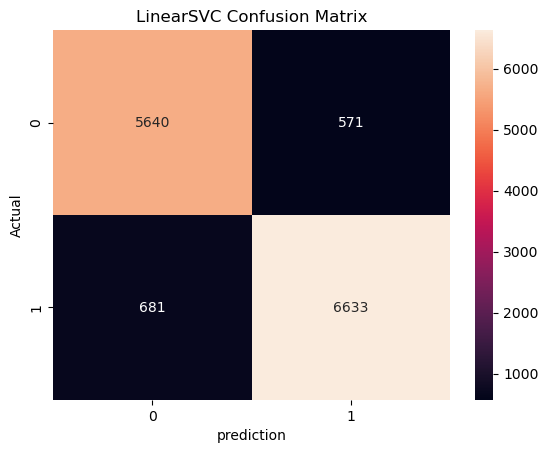

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     25278
           1       0.97      0.96      0.97     28822

    accuracy                           0.96     54100
   macro avg       0.96      0.96      0.96     54100
weighted avg       0.96      0.96      0.96     54100

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      6211
           1       0.92      0.91      0.91      7314

    accuracy                           0.91     13525
   macro avg       0.91      0.91      0.91     13525
weighted avg       0.91      0.91      0.91     13525



In [ ]:
from sklearn.svm import LinearSVC
trained_clf_svc = LinearSVC().fit(x_train, y_train)
get_accuracy('LinearSVC',trained_clf_svc,x_train, y_train, x_test, y_test)

In [ ]:
from sklearn.metrics import log_loss

test_probabilities = trained_clf_svc._predict_proba_lr(x_test)
train_probabilities = trained_clf_svc._predict_proba_lr(x_train)

# Get the log loss for the test data
test_loss = log_loss(y_test, test_probabilities)
train_loss = log_loss(y_train, train_probabilities)

# Print the training and test accuracies and loss
print("Training accuracy:", trained_clf_svc.score(x_train, y_train)*100,"%")
print("Testing accuracy   :",accuracy_score(y_pred, y_test)*100,"%")
print("Training loss       :", train_loss)
print("Testing loss       :", test_loss)

Training accuracy: 96.39371534195934 %
Testing accuracy   : 91.54158964879852 %
Training loss       : 0.3134735485086302
Testing loss       : 0.35200808082251095


## RandomForestClassifier

Training accuracy  : 99.86691312384474 %
Testing accuracy   : 90.12199630314232 %
precision :  0.9012199630314233
recall    :  0.9012199630314233
f1_score  :  0.9012199630314233


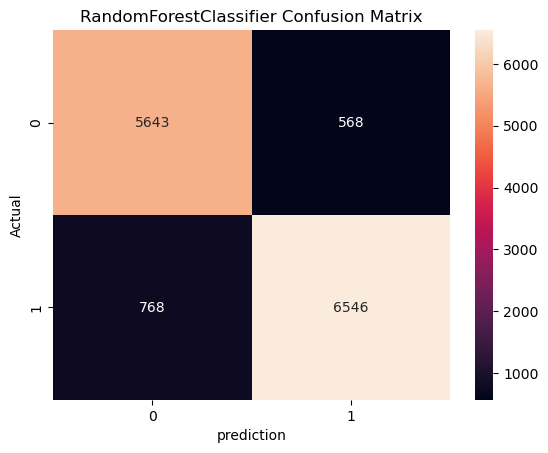

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25278
           1       1.00      1.00      1.00     28822

    accuracy                           1.00     54100
   macro avg       1.00      1.00      1.00     54100
weighted avg       1.00      1.00      1.00     54100

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      6211
           1       0.92      0.89      0.91      7314

    accuracy                           0.90     13525
   macro avg       0.90      0.90      0.90     13525
weighted avg       0.90      0.90      0.90     13525



In [ ]:
from sklearn.ensemble import RandomForestClassifier
trained_clf_random_forest = RandomForestClassifier(n_estimators=50).fit(x_train, y_train)
get_accuracy('RandomForestClassifier',trained_clf_random_forest,x_train, y_train, x_test, y_test)

In [ ]:
from sklearn.metrics import log_loss

y_pred=trained_clf_random_forest.predict(x_test)

test_probabilities = trained_clf_random_forest.predict_proba(x_test)
train_probabilities = trained_clf_random_forest.predict_proba(x_train)

# Get the log loss for the test data
test_loss = log_loss(y_test, test_probabilities)
train_loss = log_loss(y_train, train_probabilities)

# Print the training and test accuracies and loss
print("Training accuracy:", trained_clf_random_forest.score(x_train, y_train))
print("Testing accuracy   :",accuracy_score(y_pred, y_test))
print("Training loss       :", train_loss)
print("Testing loss       :", test_loss)

Training accuracy: 0.9986691312384474
Testing accuracy   : 0.9012199630314233
Training loss       : 0.0788841784794124
Testing loss       : 0.3092534750641586


## Multinomial Naive Bayes

Training accuracy  : 91.93715341959334 %
Testing accuracy   : 90.78003696857671 %
precision :  0.907800369685767
recall    :  0.907800369685767
f1_score  :  0.907800369685767


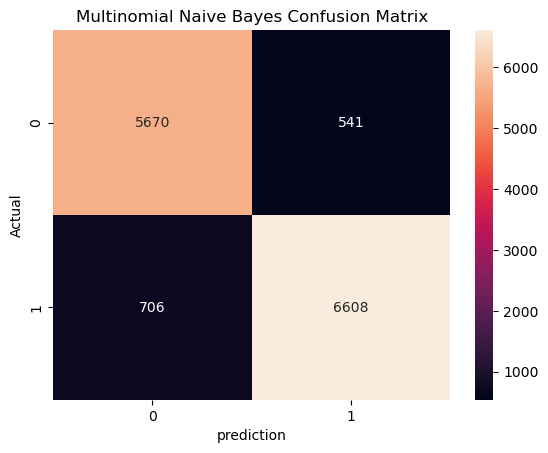

              precision    recall  f1-score   support

           0       0.90      0.93      0.92     25278
           1       0.94      0.91      0.92     28822

    accuracy                           0.92     54100
   macro avg       0.92      0.92      0.92     54100
weighted avg       0.92      0.92      0.92     54100

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      6211
           1       0.92      0.90      0.91      7314

    accuracy                           0.91     13525
   macro avg       0.91      0.91      0.91     13525
weighted avg       0.91      0.91      0.91     13525



In [ ]:
clf_NB = MultinomialNB().fit(x_train, y_train)
get_accuracy('Multinomial Naive Bayes',clf_NB,x_train, y_train, x_test, y_test)

In [ ]:
from sklearn.metrics import log_loss
y_pred = clf_NB.predict(x_test)
y_prob = clf_NB.predict_proba(x_test)

test_loss = log_loss(y_test, y_prob, eps=1e-15)
train_loss = log_loss(y_train, clf_NB.predict_proba(x_train), eps=1e-15)

print("Training accuracy:", clf_NB.score(x_train, y_train)*100,"%")
print("Testing accuracy   :",accuracy_score(y_pred, y_test)*100,"%")
print("Training loss       :", train_loss)
print("Testing loss       :", test_loss)

Training accuracy: 91.93715341959334 %
Testing accuracy   : 90.78003696857671 %
Training loss       : 0.22307803770043716
Testing loss       : 0.246083874704793


### LogisticRegression


Training accuracy  : 92.69685767097967 %
Testing accuracy   : 91.54158964879852 %
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      6211
           1       0.93      0.91      0.92      7314

    accuracy                           0.92     13525
   macro avg       0.91      0.92      0.92     13525
weighted avg       0.92      0.92      0.92     13525



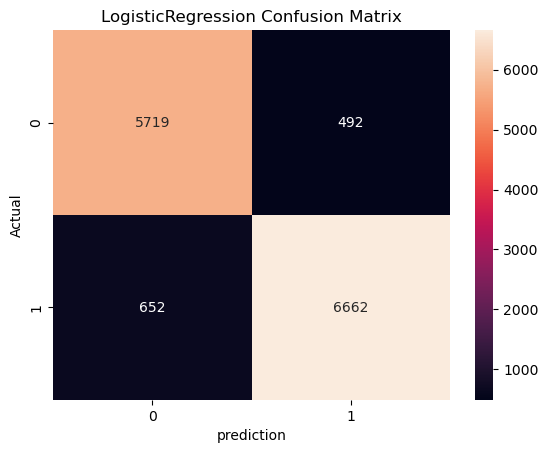

In [ ]:
trained_clf_LogisticRegression = LogisticRegression(max_iter=200,solver='lbfgs').fit(x_train, y_train)
y_pred=trained_clf_LogisticRegression.predict(x_test)
train_predict = trained_clf_LogisticRegression.predict(x_train)

print("Training accuracy  :",metrics.accuracy_score(y_train, train_predict)*100 ,"%")
print("Testing accuracy   :",metrics.accuracy_score(y_test, y_pred)*100 , "%")
print(classification_report(y_test, y_pred))

cf1 = confusion_matrix(y_test,y_pred)
sns.heatmap(cf1,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title('LogisticRegression'+ ' Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import log_loss

test_probabilities = trained_clf_LogisticRegression.predict_proba(x_test)
train_probabilities = trained_clf_LogisticRegression.predict_proba(x_train)

# Get the log loss for the test data
test_loss = log_loss(y_test, test_probabilities)
train_loss = log_loss(y_train, train_probabilities)

# Print the training and test accuracies and loss
print("Training accuracy:", trained_clf_LogisticRegression.score(x_train, y_train)*100,"%")
print("Testing accuracy   :",accuracy_score(y_pred, y_test)*100,"%")
print("Training loss       :", train_loss)
print("Testing loss       :", test_loss)

Training accuracy: 92.69685767097967 %
Testing accuracy   : 91.54158964879852 %
Training loss       : 0.21834091074025241
Testing loss       : 0.24177024721725432


In [ ]:
import pickle
pickle.dump(trained_clf_LogisticRegression, open("LogisticRegressionModel.pk", "wb"))

## DeepLearning Models


In [4]:
# Detect hardware, return appropriate distribution strategy
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

Running on TPU  grpc://10.82.119.146:8470


REPLICAS:  8


# Prepare Dataset

In [5]:
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, GRU,Bidirectional

In [6]:
min_sample = df.groupby(['rating']).count().preprocessed_text.min()
input_data = pd.concat([df[df.rating == 1].head(min_sample),
                        df[df.rating == 0].head(min_sample)])

X = input_data.preprocessed_text.astype('str').values #training paramter
Y = np.asarray(input_data.rating.values).astype('float32') #prediction paramter
Y = Y.clip(0, 1)
X_train, X_test, label_train, label_test = train_test_split(X, Y, test_size=0.2, random_state=42,shuffle=True)

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
print("vocab size:",len(tokenizer.word_index))
X_train = pad_sequences(X_train, padding='post', maxlen=300)


print("Training:", len(X_train))


vocab size: 10702
Training: 50382


In [7]:
X_test = tokenizer.texts_to_sequences(X_test)
print("vocab size:",len(tokenizer.word_index))
X_test = pad_sequences(X_test, padding='post', maxlen=300)
print("Testing: ", len(X_test))


vocab size: 10702
Testing:  12596


In [9]:
label_train = pd.get_dummies(label_train).values
label_test = pd.get_dummies(label_test).values


In [8]:
import pickle
pickle.dump(tokenizer, open("tokenizer_texts_to_sequences.pk", "wb"))

### RNN

In [ ]:
%%time
with strategy.scope():
  dropout = 0.5
  opt = 'adam'
  model4 = Sequential()

  model4.add(layers.Embedding(input_dim=5000, output_dim=100, input_length=300))
  model4.add(layers.SimpleRNN(units=100, return_sequences=True))
  model4.add(layers.GlobalMaxPool1D())
  model4.add(layers.Dense(64, activation='relu'))
  model4.add(layers.Dense(32, activation='relu'))
  model4.add(layers.Dense(1, activation='sigmoid'))

  model4.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
  model4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 100)          500000    
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 300, 100)          20100     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 100)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_3 (Dense)             (None, 64)                6464      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                      

In [ ]:
history4 = model4.fit(X_train, label_train, epochs=20, verbose=True,  validation_data=(X_test, label_test),batch_size=32*strategy.num_replicas_in_sync)
loss_val, accuracy_val = model4.evaluate(X_test, label_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy_val))

Epoch 1/20
197/197 [==============================] - 21s 78ms/step - loss: 0.5052 - accuracy: 0.7403 - val_loss: 0.2998 - val_accuracy: 0.8866
Epoch 2/20
197/197 [==============================] - 8s 38ms/step - loss: 0.2600 - accuracy: 0.9016 - val_loss: 0.2684 - val_accuracy: 0.8966
Epoch 3/20
197/197 [==============================] - 8s 39ms/step - loss: 0.2193 - accuracy: 0.9177 - val_loss: 0.2774 - val_accuracy: 0.8989
Epoch 4/20
197/197 [==============================] - 10s 53ms/step - loss: 0.1952 - accuracy: 0.9271 - val_loss: 0.2685 - val_accuracy: 0.9008
Epoch 5/20
197/197 [==============================] - 7s 35ms/step - loss: 0.1746 - accuracy: 0.9365 - val_loss: 0.2886 - val_accuracy: 0.8938
Epoch 6/20
197/197 [==============================] - 9s 44ms/step - loss: 0.1537 - accuracy: 0.9455 - val_loss: 0.3079 - val_accuracy: 0.8860
Epoch 7/20
197/197 [==============================] - 8s 39ms/step - loss: 0.1354 - accuracy: 0.9521 - val_loss: 0.3110 - val_accuracy: 0.89

In [ ]:
#model4.save('SimpleRNN_Model.h5')

394/394 [==============================] - 6s 12ms/step


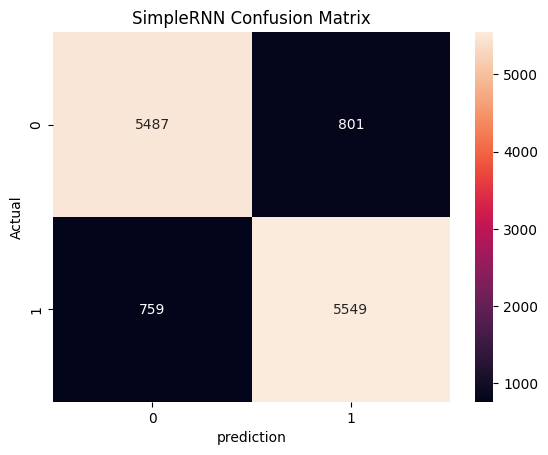

In [ ]:
y_pred4=model4.predict(X_test)
y_pred4 = (y_pred4 >= 0.5).astype(int)
y_test_class=np.array(label_test)

SimpleRNN = confusion_matrix(y_test_class,y_pred4)
sns.heatmap(SimpleRNN,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title("SimpleRNN"+ ' Confusion Matrix')
plt.show()

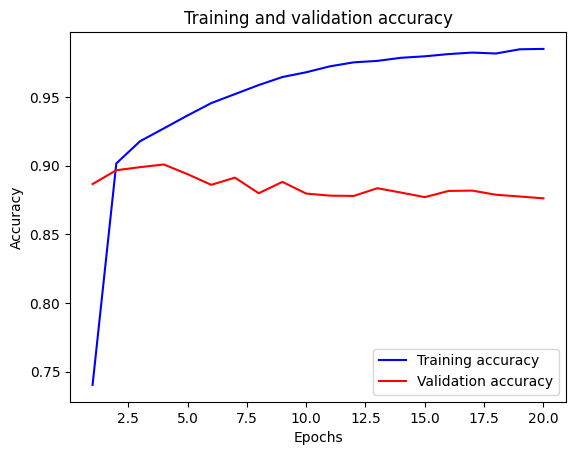

In [ ]:
accuracy = history4.history['accuracy']
val_accuracy = history4.history['val_accuracy']
loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs = range(1,len(accuracy) + 1)

# Plot accuracy
plt.figure(1)
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

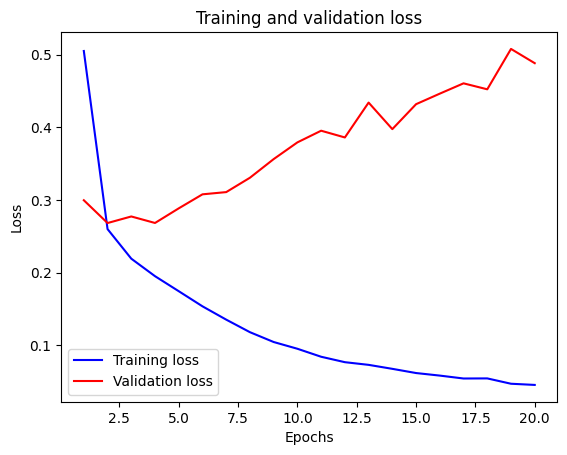

In [ ]:
# Plot loss
plt.figure(2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### CNN

In [ ]:
from keras.layers import Input, Dense, Dropout, Embedding, Conv1D, MaxPooling1D, LSTM, concatenate,Flatten
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from keras.layers import Bidirectional

In [ ]:
with strategy.scope():
  embedding_dim = 50
  CNN_LSTM = Sequential()
  CNN_LSTM.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=embedding_dim, input_length=300))

  CNN_LSTM.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
  CNN_LSTM.add((LSTM(60, return_sequences=True)))
  CNN_LSTM.add(Flatten())
  CNN_LSTM.add(layers.Dense(64, activation='relu'))
  CNN_LSTM.add(Dense(32, activation='relu'))
  CNN_LSTM.add(Dense(1, activation='sigmoid'))

  CNN_LSTM.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
CNN_LSTM.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 300, 50)           535150    
                                                                 
 conv1d_4 (Conv1D)           (None, 298, 32)           4832      
                                                                 
 lstm_9 (LSTM)               (None, 298, 60)           22320     
                                                                 
 flatten_4 (Flatten)         (None, 17880)             0         
                                                                 
 dense_34 (Dense)            (None, 64)                1144384   
                                                                 
 dense_35 (Dense)            (None, 32)                2080      
                                                                 
 dense_36 (Dense)            (None, 1)                

In [ ]:
history6 = CNN_LSTM.fit(X_train, label_train, epochs=20, verbose=True,  validation_data=(X_test, label_test),batch_size=32*strategy.num_replicas_in_sync)
loss_val, accuracy_val = CNN_LSTM.evaluate(X_test, label_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy_val))

Epoch 1/20
197/197 [==============================] - 26s 91ms/step - loss: 0.3456 - accuracy: 0.8410 - val_loss: 0.2565 - val_accuracy: 0.9023
Epoch 2/20
197/197 [==============================] - 11s 55ms/step - loss: 0.2235 - accuracy: 0.9153 - val_loss: 0.2541 - val_accuracy: 0.9005
Epoch 3/20
197/197 [==============================] - 11s 58ms/step - loss: 0.1920 - accuracy: 0.9307 - val_loss: 0.2529 - val_accuracy: 0.9030
Epoch 4/20
197/197 [==============================] - 12s 59ms/step - loss: 0.1633 - accuracy: 0.9423 - val_loss: 0.2858 - val_accuracy: 0.8912
Epoch 5/20
197/197 [==============================] - 11s 57ms/step - loss: 0.1368 - accuracy: 0.9538 - val_loss: 0.2899 - val_accuracy: 0.8961
Epoch 6/20
197/197 [==============================] - 11s 56ms/step - loss: 0.1148 - accuracy: 0.9621 - val_loss: 0.3122 - val_accuracy: 0.8961
Epoch 7/20
197/197 [==============================] - 11s 56ms/step - loss: 0.0953 - accuracy: 0.9695 - val_loss: 0.3338 - val_accuracy:

In [ ]:
#CNN_LSTM.save('CNN_LSTM.h5')

394/394 [==============================] - 7s 15ms/step


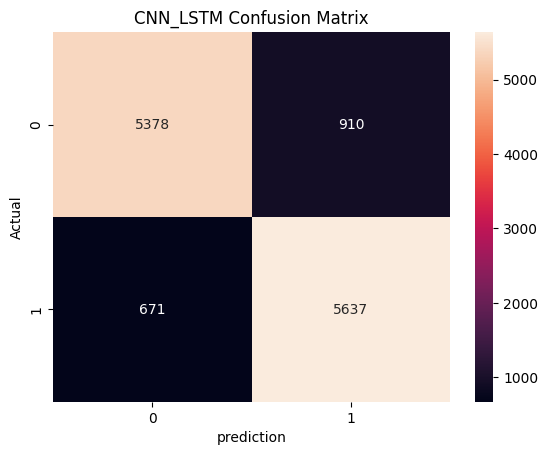

In [ ]:
y_pred6=CNN_LSTM.predict(X_test)
y_pred6 = (y_pred6 >= 0.5).astype(int)
y_test_class=np.array(label_test)

CNN_LSTM = confusion_matrix(y_test_class,y_pred6)
sns.heatmap(CNN_LSTM,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title("CNN_LSTM"+ ' Confusion Matrix')
plt.show()

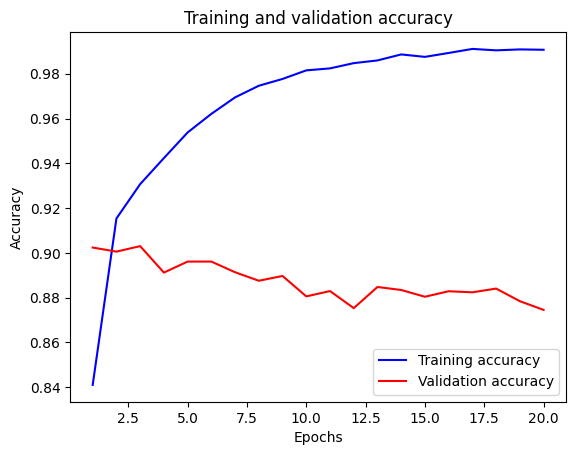

In [ ]:
accuracy = history6.history['accuracy']
val_accuracy = history6.history['val_accuracy']
loss = history6.history['loss']
val_loss = history6.history['val_loss']

epochs = range(1,len(accuracy) + 1)

# Plot accuracy
plt.figure(1)
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

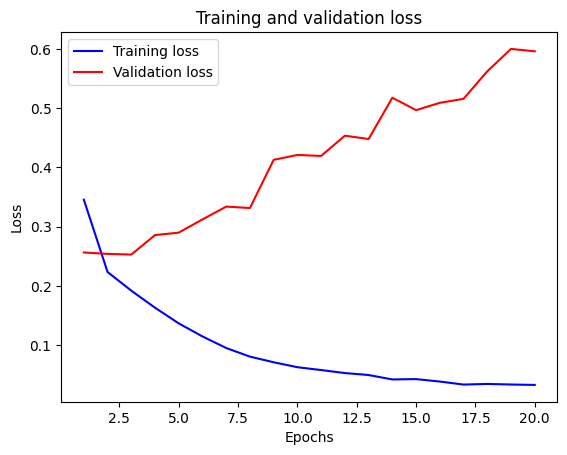

In [ ]:
# Plot loss
plt.figure(2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### LSTM

In [ ]:
# LSTM model with keras
%%time
with strategy.scope():
    dropout = 0.5
    opt = 'adam'
    model2 = Sequential()
    model2.add(layers.Embedding(input_dim=5000, output_dim=100, input_length=300))

    model2.add(layers.LSTM(100, dropout=0.5, recurrent_dropout=0.5, return_sequences=True))
    model2.add(layers.LSTM(60, dropout=0.5, recurrent_dropout=0.5, return_sequences=True))
    model2.add(layers.GlobalMaxPool1D())
    model2.add(layers.Dense(128, activation='relu'))
    model2.add(layers.Dropout(dropout))
    model2.add(layers.Dense(64, activation='relu'))
    model2.add(layers.Dropout(dropout))
    model2.add(layers.Dense(32, activation='relu'))
    model2.add(layers.Dropout(dropout))
    model2.add(layers.Dense(1, activation='sigmoid'))

    model2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 300, 100)          500000    
                                                                 
 lstm_3 (LSTM)               (None, 300, 100)          80400     
                                                                 
 lstm_4 (LSTM)               (None, 300, 60)           38640     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 60)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_15 (Dense)            (None, 128)               7808      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                      

In [ ]:
history2 = model2.fit(X_train, label_train, epochs=20, verbose=True,  validation_data=(X_test, label_test),batch_size=32*strategy.num_replicas_in_sync)
loss_val, accuracy_val = model2.evaluate(X_test, label_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy_val))

Epoch 1/20
197/197 [==============================] - 56s 200ms/step - loss: 0.5395 - accuracy: 0.7337 - val_loss: 0.3623 - val_accuracy: 0.8666
Epoch 2/20
197/197 [==============================] - 29s 145ms/step - loss: 0.3134 - accuracy: 0.8918 - val_loss: 0.2693 - val_accuracy: 0.8999
Epoch 3/20
197/197 [==============================] - 29s 146ms/step - loss: 0.2675 - accuracy: 0.9063 - val_loss: 0.2615 - val_accuracy: 0.8994
Epoch 4/20
197/197 [==============================] - 29s 147ms/step - loss: 0.2487 - accuracy: 0.9120 - val_loss: 0.2662 - val_accuracy: 0.8954
Epoch 5/20
197/197 [==============================] - 29s 147ms/step - loss: 0.2355 - accuracy: 0.9147 - val_loss: 0.2599 - val_accuracy: 0.8979
Epoch 6/20
197/197 [==============================] - 29s 148ms/step - loss: 0.2260 - accuracy: 0.9176 - val_loss: 0.2645 - val_accuracy: 0.8972
Epoch 7/20
197/197 [==============================] - 29s 146ms/step - loss: 0.2192 - accuracy: 0.9210 - val_loss: 0.2819 - val_ac

In [ ]:
#model2.save('LSTM_Model.h5')

394/394 [==============================] - 12s 27ms/step


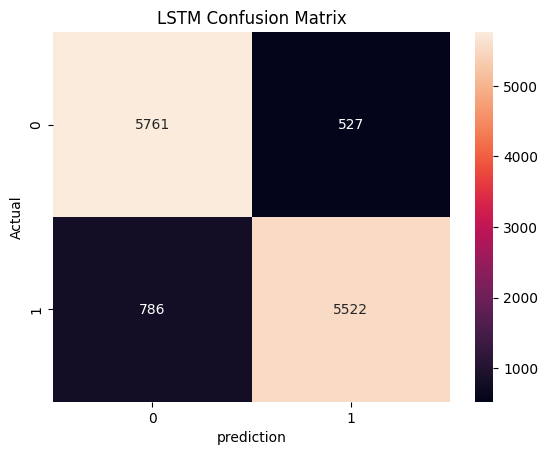

In [ ]:
y_pred2=model2.predict(X_test)
y_pred2 = (y_pred2 >= 0.5).astype(int)
y_test_class=np.array(label_test)

lstm = confusion_matrix(y_test_class,y_pred2)
sns.heatmap(lstm,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title("LSTM"+ ' Confusion Matrix')
plt.show()

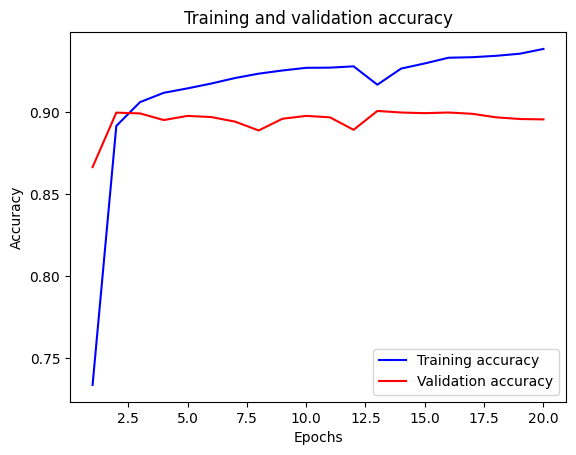

In [ ]:
accuracy = history2.history['accuracy']
val_accuracy = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1,len(accuracy) + 1)

# Plot accuracy
plt.figure(1)
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


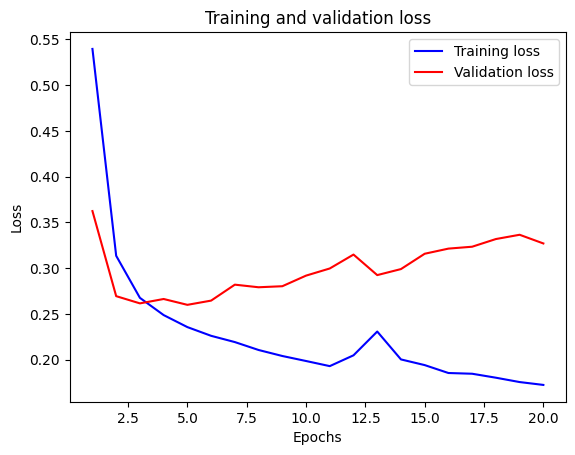

In [ ]:
# Plot loss
plt.figure(2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### BILSTM

In [12]:
# Define the model architecture
%%time
with strategy.scope():
  embedding_dim = 50
  biLSTM = Sequential()
  biLSTM.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=embedding_dim, input_length=300))
  biLSTM.add(Bidirectional(LSTM(64)))
  biLSTM.add(Dense(128, activation='relu'))
  biLSTM.add(Dense(64, activation='relu'))
  biLSTM.add(Dropout(0.5))
  biLSTM.add(Dense(32, activation='relu'))
  biLSTM.add(Dense(16, activation='relu'))
  biLSTM.add(Dense(2, activation='softmax'))

  from keras import optimizers
  optimizer = optimizers.Adam(learning_rate=0.0001)
  biLSTM.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  biLSTM.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 50)           535150    
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              58880     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                      

In [13]:
biLSTM_history = biLSTM.fit(X_train, label_train, epochs=20,batch_size=32*strategy.num_replicas_in_sync,validation_data=(X_test, label_test))
loss_val, accuracy_val = biLSTM.evaluate(X_test, label_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy_val))

Epoch 1/20
197/197 [==============================] - 38s 135ms/step - loss: 0.6075 - accuracy: 0.6917 - val_loss: 0.3464 - val_accuracy: 0.8667
Epoch 2/20
197/197 [==============================] - 20s 100ms/step - loss: 0.3100 - accuracy: 0.8849 - val_loss: 0.2794 - val_accuracy: 0.8944
Epoch 3/20
197/197 [==============================] - 20s 99ms/step - loss: 0.2694 - accuracy: 0.9019 - val_loss: 0.2680 - val_accuracy: 0.8991
Epoch 4/20
197/197 [==============================] - 20s 100ms/step - loss: 0.2539 - accuracy: 0.9093 - val_loss: 0.2653 - val_accuracy: 0.8985
Epoch 5/20
197/197 [==============================] - 20s 99ms/step - loss: 0.2441 - accuracy: 0.9137 - val_loss: 0.2675 - val_accuracy: 0.8989
Epoch 6/20
197/197 [==============================] - 20s 99ms/step - loss: 0.2386 - accuracy: 0.9155 - val_loss: 0.2619 - val_accuracy: 0.9004
Epoch 7/20
197/197 [==============================] - 20s 100ms/step - loss: 0.2323 - accuracy: 0.9192 - val_loss: 0.2657 - val_accur

In [87]:
biLSTM.save('Approach2_Arabic_BILSTM_Model.h5')

In [13]:
sentences

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
biLSTM = load_model('Approach2_Arabic_BILSTM_Model.h5')


394/394 [==============================] - 14s 22ms/step


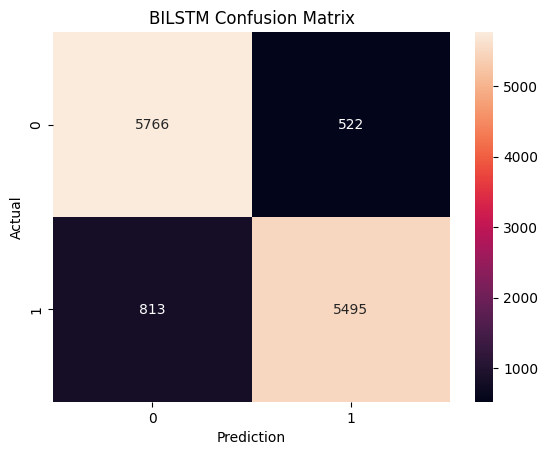

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6288
           1       0.91      0.87      0.89      6308

    accuracy                           0.89     12596
   macro avg       0.89      0.89      0.89     12596
weighted avg       0.89      0.89      0.89     12596



In [91]:
from sklearn.metrics import classification_report
y_pred=biLSTM.predict(X_test)
y_pred_binary = np.argmax(y_pred, axis=1)  # Assign the class with the highest probability
cm = confusion_matrix(label_test[:, 1], y_pred_binary)  # Assuming the second column represents the positive class

# Print the classification report
report = classification_report(label_test[:, 1], y_pred_binary)

sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title("BILSTM" + ' Confusion Matrix')
plt.show()
print(report)


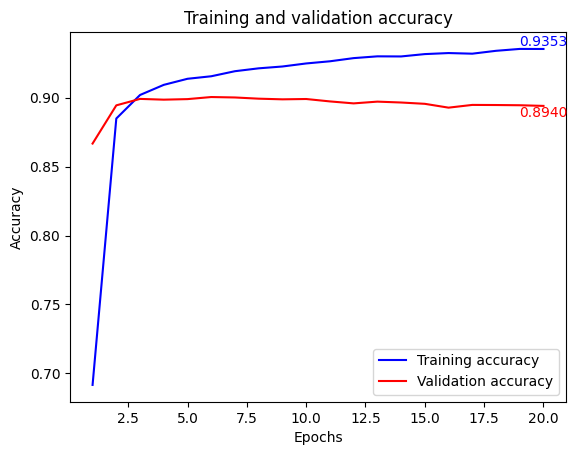

In [92]:
accuracy = biLSTM_history.history['accuracy']
val_accuracy = biLSTM_history.history['val_accuracy']
loss = biLSTM_history.history['loss']
val_loss = biLSTM_history.history['val_loss']

epochs = range(1, len(accuracy) + 1)

# Plot accuracy
plt.figure(1)
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Print final accuracy values on the graph
final_train_acc = accuracy[-1]
final_val_acc = val_accuracy[-1]
plt.text(len(accuracy), final_train_acc, f'{final_train_acc:.4f}', ha='center', va='bottom', color='blue')
plt.text(len(val_accuracy), final_val_acc, f'{final_val_acc:.4f}', ha='center', va='top', color='red')

plt.show()


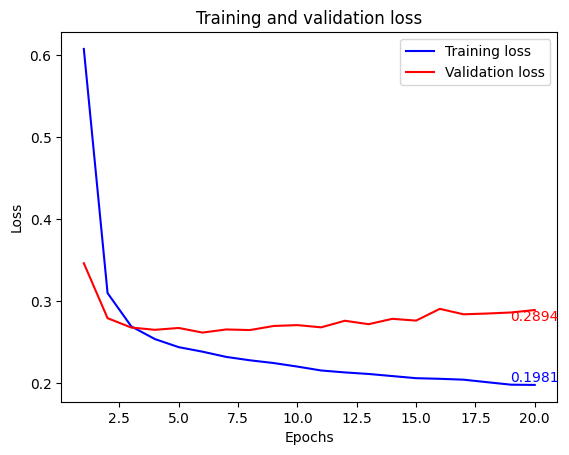

In [93]:
accuracy = biLSTM_history.history['accuracy']
val_accuracy = biLSTM_history.history['val_accuracy']
loss = biLSTM_history.history['loss']
val_loss = biLSTM_history.history['val_loss']

epochs = range(1, len(accuracy) + 1)


# Plot loss
plt.figure(2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Print final loss values on the graph
final_train_loss = loss[-1]
final_val_loss = val_loss[-1]
plt.text(len(loss), final_train_loss, f'{final_train_loss:.4f}', ha='center', va='bottom', color='blue')
plt.text(len(val_loss), final_val_loss, f'{final_val_loss:.4f}', ha='center', va='top', color='red')

plt.show()


In [101]:
test = tokenizer.texts_to_sequences(output)
print("vocab size:",len(tokenizer.word_index))
test = pad_sequences(test, padding='post', maxlen=300)
print("Testing: ", len(test))


vocab size: 10702
Testing:  10


In [102]:
test

array([[ 193,  165,   94, ...,    0,    0,    0],
       [  53,    1,   94, ...,    0,    0,    0],
       [ 146,   95,   65, ...,    0,    0,    0],
       ...,
       [  65,    5, 1562, ...,    0,    0,    0],
       [  32,   19,   12, ...,    0,    0,    0],
       [   5,  224,  249, ...,    0,    0,    0]], dtype=int32)

In [106]:

test = np.array(test)

# Predict the class for the input sequence
y_pred2 = biLSTM.predict(test, batch_size=1, verbose=2)[0]
y_pred2 = np.argmax(y_pred2)
class_labels = [0, 1]
predictions = [class_labels[np.argmax(pred)] for pred in y_pred]
pred=[]
# Print the predicted class label for each word in the sequence
for word, prediction in zip(test, predictions):
    print("| Predicted class:", prediction)
    pred.append(prediction)

10/10 - 1s - 1s/epoch - 100ms/step
| Predicted class: 1
| Predicted class: 0
| Predicted class: 1
| Predicted class: 1
| Predicted class: 0
| Predicted class: 1
| Predicted class: 0
| Predicted class: 1
| Predicted class: 1
| Predicted class: 0


In [107]:
df2=pd.DataFrame()
df2['Reviews']=sentences
df2['prediction']=pred
df2

,Reviews,prediction
0,الهاتف المحمول ده رهيب وبيعمل كل حاجة.,1
1,الجودة في المنتج ده ممتازة والأداء مذهل.,0
2,الشاشة بتاعة الجهاز ده جميلة جدا وواضحة.,1
3,البطارية في الهاتف ممتازة وبتقعد طويل.,1
4,الكاميرا في الجهاز ده رائعة وتلتقط صور جميلة.,0
5,الجهاز بطيء أوي والتطبيقات بتعلق كتير.,1
6,المنتج ده جودته ضعيفة ومش بيستحق السعر.,0
7,الجهاز مش مستقر وبيهنج بشكل متكرر.,1
8,الصوت في السماعة سيء وغير واضح.,1
9,مش بيدعم ميزات كتير والخيارات محدودة.,0


In [ ]:
test=df_preprocessor.preprocessing("this phone is very bad")
result = ' '.join(test)
result=tokenizer.texts_to_sequences(result)
result = pad_sequences(result, padding='post', maxlen=300)
y_pred2 = biLSTM.predict(result,batch_size=1,verbose = 2)[0]
y_pred2 = np.argmax(y_pred2)
if y_pred2 ==0:
    class_label = 'Negative'
else:
    class_label = 'Positive'
print("Predicted class:", class_label)


9/9 - 1s - 848ms/epoch - 94ms/step
Predicted class: Negative


In [ ]:
test=df_preprocessor.preprocessing("the display is good")
result = ' '.join(test)
result=tokenizer.texts_to_sequences(result)
result = pad_sequences(result, padding='post', maxlen=300)
y_pred2 = biLSTM.predict(result,batch_size=1,verbose = 2)[0]
y_pred2 = np.argmax(y_pred2)
if y_pred2 ==0:
    class_label = 'Negative'
else:
    class_label = 'Positive'
print("Predicted class:", class_label)


12/12 - 1s - 811ms/epoch - 68ms/step
Predicted class: Negative


In [ ]:
test=df_preprocessor.preprocessing("Quality of product is lower than expected")
result = ' '.join(test)
result=tokenizer.texts_to_sequences(result)
result = pad_sequences(result, padding='post', maxlen=300)
y_pred2 = biLSTM.predict(result,batch_size=1,verbose = 2)[0]
y_pred2 = np.argmax(y_pred2)
if y_pred2 ==0:
    class_label = 'Negative'
else:
    class_label = 'Positive'
print("Predicted class:", class_label)


30/30 - 2s - 2s/epoch - 64ms/step
Predicted class: Negative


### Bidirectional GRU

In [ ]:
%%time
with strategy.scope():
  #create BIGRU model with keras
  dropout = 0.5
  opt = 'adam'
  # clear_session()
  model = Sequential()
  model.add(layers.Embedding(input_dim=5000, output_dim=100, input_length=300))
  model.add(layers.Bidirectional(layers.GRU(100, dropout=0.5, recurrent_dropout=0.5, return_sequences=True)))

  model.add(layers.Bidirectional(layers.GRU(50, dropout=0.5, recurrent_dropout=0.5, return_sequences=True)))
  model.add(layers.GlobalMaxPool1D())
  model.add(layers.Dense(128, activation='relu'))
  model.add(layers.Dropout(dropout))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dropout(dropout))
  model.add(layers.Dense(32, activation='relu'))
  model.add(layers.Dropout(dropout))
  model.add(layers.Dense(1, activation='sigmoid'))

  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 300, 100)          500000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 300, 200)         121200    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 300, 100)         75600     
 nal)                                                            
                                                                 
 global_max_pooling1d_4 (Glo  (None, 100)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_23 (Dense)            (None, 128)               12928     
                                                      

In [ ]:
history = model.fit(X_train, label_train, epochs=15, verbose=True,  validation_data=(X_test, label_test),batch_size=32*strategy.num_replicas_in_sync)
loss_val, accuracy_val = model.evaluate(X_test, label_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy_val))

Epoch 1/15
197/197 [==============================] - 129s 534ms/step - loss: 0.4449 - accuracy: 0.7771 - val_loss: 0.2680 - val_accuracy: 0.8966
Epoch 2/15
197/197 [==============================] - 88s 446ms/step - loss: 0.2760 - accuracy: 0.9042 - val_loss: 0.2635 - val_accuracy: 0.9020
Epoch 3/15
197/197 [==============================] - 88s 446ms/step - loss: 0.2521 - accuracy: 0.9114 - val_loss: 0.2590 - val_accuracy: 0.9030
Epoch 4/15
197/197 [==============================] - 88s 445ms/step - loss: 0.2346 - accuracy: 0.9170 - val_loss: 0.2575 - val_accuracy: 0.9040
Epoch 5/15
197/197 [==============================] - 88s 446ms/step - loss: 0.2217 - accuracy: 0.9197 - val_loss: 0.2626 - val_accuracy: 0.9031
Epoch 6/15
197/197 [==============================] - 88s 447ms/step - loss: 0.2114 - accuracy: 0.9247 - val_loss: 0.2589 - val_accuracy: 0.9016
Epoch 7/15
197/197 [==============================] - 88s 446ms/step - loss: 0.2006 - accuracy: 0.9273 - val_loss: 0.2721 - val_a

In [ ]:
#model.save('BIGRU_Model.h5')

394/394 [==============================] - 18s 41ms/step


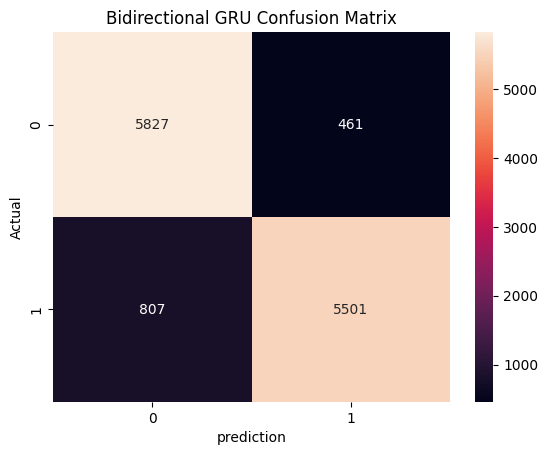

In [ ]:
y_pred=model.predict(X_test)
y_pred = (y_pred >= 0.5).astype(int)
y_test_class=np.array(label_test)

GRU = confusion_matrix(y_test_class,y_pred)
sns.heatmap(GRU,annot=True,fmt = '.0f')
plt.xlabel('prediction')
plt.ylabel('Actual')
plt.title("Bidirectional GRU"+ ' Confusion Matrix')
plt.show()

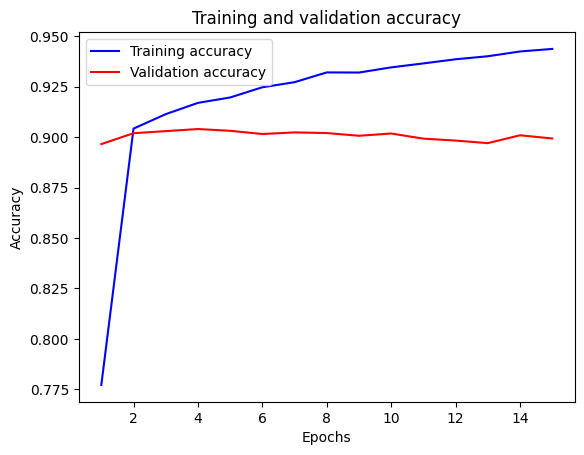

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(accuracy) + 1)

# Plot accuracy
plt.figure(1)
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

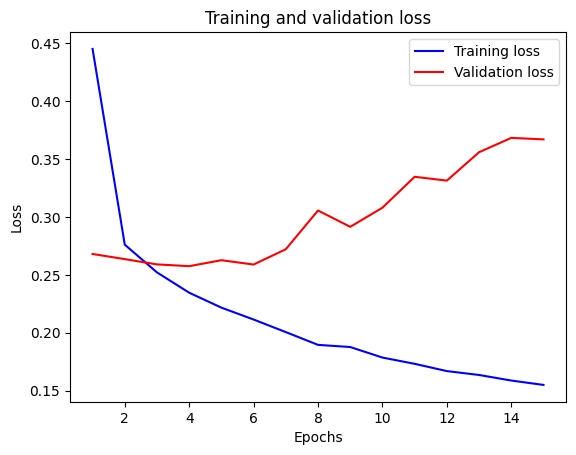

In [ ]:
# Plot loss
plt.figure(2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Attention Mode

In [ ]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, Concatenate, Dot, Softmax, Reshape

with strategy.scope():
    # Define input
    inputs = Input(shape=(300,), dtype='int32')
    # Define embedding layer
    embedding_layer = Embedding(input_dim=5000, output_dim=100, input_length=300)(inputs)
    # Define first LSTM layer with bidirectional wrapper
    lstm_layer1 = Bidirectional(LSTM(60, dropout=0.5, recurrent_dropout=0.5, return_sequences=True))(embedding_layer)
    # Define attention mechanism
    attention_probs = Dense(60, activation='softmax', name='attention_probs')(lstm_layer1)
    attention_mul = Dot(name='attention_mul', axes=1)([attention_probs, lstm_layer1])
    # Define pooling layer
    global_pooling = layers.GlobalMaxPool1D()(attention_mul)
    # Define dense layers with dropout
    dense_layer1 = Dense(128, activation='relu')(global_pooling)
    dropout_layer1 = Dropout(0.5)(dense_layer1)
    dense_layer2 = Dense(64, activation='relu')(dropout_layer1)
    dropout_layer2 = Dropout(0.5)(dense_layer2)
    dense_layer3 = Dense(32, activation='relu')(dropout_layer2)
    dropout_layer3 = Dropout(0.5)(dense_layer3)
    # Define output layer
    outputs = Dense(1, activation='sigmoid')(dropout_layer3)
    # Define model
    model5 = Model(inputs=inputs, outputs=outputs)
    model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model5.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300)]        0           []                               
                                                                                                  
 embedding_8 (Embedding)        (None, 300, 100)     500000      ['input_1[0][0]']                
                                                                                                  
 bidirectional_4 (Bidirectional  (None, 300, 120)    77280       ['embedding_8[0][0]']            
 )                                                                                                
                                                                                                  
 attention_probs (Dense)        (None, 300, 60)      7260        ['bidirectional_4[0][0]']    

In [ ]:
history5 = model5.fit(X_train, label_train, epochs=30, verbose=True,  validation_data=(X_test, label_test),batch_size=64*strategy.num_replicas_in_sync)
loss_val, accuracy_val = model5.evaluate(X_test, label_test, verbose=True)
print("Testing Accuracy:  {:.4f}".format(accuracy_val))

Epoch 1/30
99/99 [==============================] - 47s 327ms/step - loss: 0.6941 - accuracy: 0.5006 - val_loss: 0.6929 - val_accuracy: 0.5043
Epoch 2/30
99/99 [==============================] - 21s 208ms/step - loss: 0.6295 - accuracy: 0.6168 - val_loss: 0.4301 - val_accuracy: 0.8295
Epoch 3/30
99/99 [==============================] - 21s 209ms/step - loss: 0.3344 - accuracy: 0.8822 - val_loss: 0.2800 - val_accuracy: 0.8969
Epoch 4/30
99/99 [==============================] - 21s 208ms/step - loss: 0.2793 - accuracy: 0.9015 - val_loss: 0.2974 - val_accuracy: 0.8872
Epoch 5/30
99/99 [==============================] - 21s 208ms/step - loss: 0.2624 - accuracy: 0.9040 - val_loss: 0.2877 - val_accuracy: 0.8929
Epoch 6/30
99/99 [==============================] - 21s 208ms/step - loss: 0.2420 - accuracy: 0.9103 - val_loss: 0.2764 - val_accuracy: 0.9020
Epoch 7/30
99/99 [==============================] - 21s 208ms/step - loss: 0.2296 - accuracy: 0.9138 - val_loss: 0.2819 - val_accuracy: 0.9013